# Template Matching 給模板去比對 出現在照片的哪裡
- CV_TM_SQDIFF 平方差匹配法：该方法采用平方差来进行匹配；最好的匹配值为0；匹配越差，匹配值越大。
- CV_TM_CCORR 相关匹配法：该方法采用乘法操作；数值越大表明匹配程度越好。
- CV_TM_CCOEFF 相关系数匹配法：1表示完美的匹配；-1表示最差的匹配。
- CV_TM_SQDIFF_NORMED 归一化平方差匹配法
- CV_TM_CCORR_NORMED 归一化相关匹配法
- CV_TM_CCOEFF_NORMED 归一化相关系数匹配法

![image](./images/template_match.png)

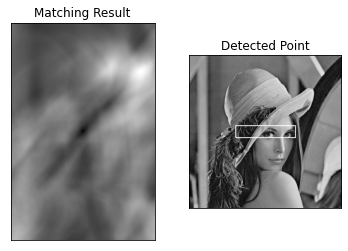

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/lena512g.bmp',0) #0=默認值為cv2.IMREAD_COLOR
img2 = img.copy()
template = cv2.imread('./images/temp.bmp',0) #模板
th, tw = template.shape[::]  #選取出長寬
img = img2.copy()

#-----執行模板比對 會產生一個矩陣----------

#rv=return value       照片  模板       方法
rv = cv2.matchTemplate(img,template,cv2.TM_SQDIFF) 

'''
.TM_SQDIFF
用模板去跟原圖比對 在每個位置用滑的 每滑一個位置就會讀出值 值越小就會越接近
值越靠近0 顏色就越"黑" 所以結果出來最黑的地方 就是符合度最高
'''

#---------標出符合模板的位置----------

# .minMaxLoc 可取得這個矩陣的 最小值 最大值 最小值索引 最大值索引
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(rv) 
topLeft = minLoc  #框框左上角座標點
bottomRight = (topLeft[0] + tw, topLeft[1] + th) #框框右下角座標點
cv2.rectangle(img,topLeft, bottomRight, 255, 2) #畫框框(框框顏色255白,粗度)

#----------畫圖------------
plt.subplot(121) #1*2 的第1張
plt.imshow(rv,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([]) 

plt.subplot(122)
plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.show()

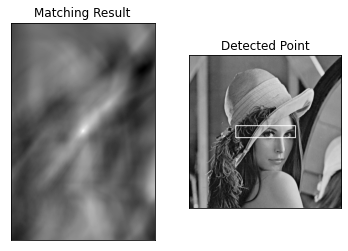

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/lena512g.bmp',0)
img2 = img.copy()
template = cv2.imread('./images/temp.bmp',0)
tw, th = template.shape[::-1]
img = img2.copy()

rv = cv2.matchTemplate(img,template,cv2.TM_CCOEFF)
'''
.TM_CCOEFF
跟上一個公式相反，這公式算出來 是要去看最白的地方就是最符合
'''

minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(rv)
topLeft = maxLoc
bottomRight = (topLeft[0] + tw, topLeft[1] + th)
cv2.rectangle(img,topLeft, bottomRight, 255, 2)

plt.subplot(121),plt.imshow(rv,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.show()

(([], []), ([], []))

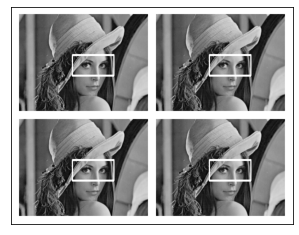

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/lena4.bmp',0)
template = cv2.imread('./images/lena4Temp.bmp',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.9  #臨界點
loc = np.where( res >= threshold) #.where 找到大於門檻的就取出來

for pt in zip(*loc[::-1]):  #畫出4個框框 *是代入的變數是tuple的寫法
#     print(pt)
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), 255, 1)
    
plt.imshow(img,cmap = 'gray')
plt.xticks([]), plt.yticks([])